<a href="https://colab.research.google.com/github/mfdali/BootcampDataAnalytics/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization with Matplotlib, Seaborn & Plotly

Author: Monique Dali @mfdali

Bootcamp challenge @WoMakersCode

Cathegorical data

* Data file: saude.csv

Time Series

* Data file: vendas.csv

##  Libraries




In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import datetime

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm

In [2]:
# Unable warning messages
import warnings
warnings.filterwarnings("ignore")

## Functions

In [ ]:
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

In [ ]:
def plot_bars(df):
  # Create bar plot
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # Create bar plot for each dataframe column
  for column in df.select_dtypes(include='object').columns:

      plt.figure(figsize=(8, 4))
      table = df[column].value_counts().sort_values(ascending=False)
      sns_plot = sns.barplot(x = table.index, y = table.values, palette='viridis')

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.title('Frequency by ' + column)
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()

In [ ]:
def plot_count(df,hue_groups=None):
  # Create bar plot of frequencies
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  list_columns = list(df.select_dtypes(include='object').columns)
  if hue_groups in list_columns: list_columns.remove(hue_groups)

  # Create bar plot for each dataframe column
  for column in list_columns:

      plt.figure(figsize=(8, 4))
      #table = df[column].value_counts().sort_values(ascending=False)
      sns_plot = sns.countplot(data=df, x = column, palette='viridis', hue=hue_groups)

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.title('Frequency by ' + column)
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()

In [ ]:
def plot_histogram(df,limits=False,hue_groups=None):
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # create histplots
  for column in df.select_dtypes(include=np.number).columns:
      plt.figure(figsize=(8, 4))
      sns_plot = sns.histplot(data = df , x = column, kde= True,stat="density",hue=hue_groups, color = "darkseagreen", palette = 'viridis')

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.title("Histogram: "+column)

# Health data

## Load data

In [3]:
# Read the dataset into a pandas dataframe
health_df = pd.read_csv('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/saude.csv',index_col=0)

In [4]:
# Show dataframe
display(health_df)

,age,height,weight,gender
id,,,,
1,23,170,70,M
2,34,160,65,F
3,45,175,80,M
4,25,165,55,F
5,36,180,90,M
6,40,170,75,F
7,29,155,60,F
8,50,160,85,M
9,38,175,78,F


In [5]:
# Summary statistics of numerical columns
health_df.describe()

,age,height,weight
count,10.000000,10.000000,10.000000
mean,34.800000,167.800000,72.600000
std,8.753412,7.857056,11.057426
min,23.000000,155.000000,55.000000
25%,28.250000,161.250000,65.750000
50%,35.000000,169.000000,72.500000
75%,39.500000,173.750000,79.500000
max,50.000000,180.000000,90.000000


# Graphs

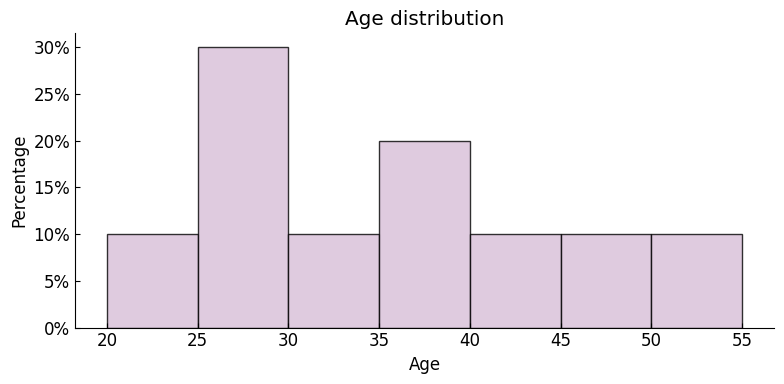

In [19]:
n_bins = 4

# Define your bins list
bins_list = [20, 25, 30, 35, 40, 45, 50, 55]

# Plotar receita por ano em séries separadas
fig, ax = plt.subplots(figsize=(8, 4))

ax.hist(health_df['age'], bins=bins_list, density=False, color='thistle', alpha=0.8, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Age distribution')
plt.xticks(range(20, 60, 5))  #x-ticks por mês

# Change y-axis to percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*10:.0f}%'))

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tight_layout()
plt.show()

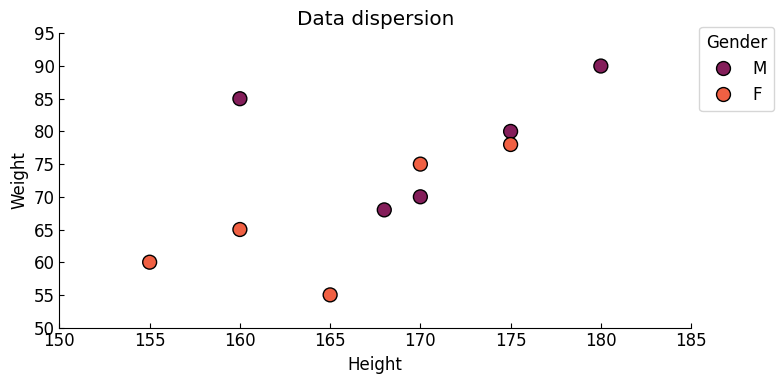

In [21]:
# Plotar receita por ano em séries separadas
fig, ax = plt.subplots(figsize=(8, 4))

# Plot
ax = sns.scatterplot(data=health_df, x='height', y='weight', s=100, hue='gender', palette='rocket', edgecolor="k", linewidth=1)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Data dispersion')
plt.xticks(range(150, 190, 5))
plt.yticks(range(50, 100, 5))

# Add legend
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1.0,1.05))

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tight_layout()
plt.show()

In [80]:
from collections import Counter

# Counting occurrences of each gender
gender_counts = Counter(health_df['gender'])

# Assigning different colors to each gender
colors = {'M': 'wheat', 'F': 'burlywood'}

# Creating the bar plot with separate traces for each gender
fig = go.Figure()
for gender, count in gender_counts.items():
    fig.add_trace(
        go.Bar(
            name=gender,
            x=[gender],
            y=[count],
            marker_color=colors[gender]
        )
    )
# Updating layout
fig.update_layout(
    title='Gender Distribution',
    xaxis=dict(
        title='Gender',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    barmode='group',
    bargap=0.15,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinate
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Gender',
    showlegend=True,
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top',
    ),
    width=800,  # Adjust width here
    height=400  # Adjust height here
)

fig.show()

# Sales data

## Load data

In [51]:
# Read the dataset into a pandas dataframe
sales_df = pd.read_csv('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/vendas.csv',index_col=0)

In [52]:
sales_df.reset_index(inplace=True)

In [53]:
# convert column "date" to datetime type
sales_df["date"] = pd.to_datetime(sales_df["date"])

In [56]:
sales_df.set_index('date', inplace=True)

In [57]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2023-01-01 to 2023-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [58]:
# Show dataframe
display(sales_df)

,sales
date,
2023-01-01,100
2023-01-02,150
2023-01-03,200
2023-01-04,130
2023-01-05,180
2023-01-06,220
2023-01-07,210
2023-01-08,190
2023-01-09,170


In [59]:
# Summary statistics of numerical columns
sales_df.describe()

,sales
count,31.000000
mean,258.387097
std,82.101432
min,100.000000
25%,200.000000
50%,250.000000
75%,325.000000
max,400.000000


# Graphs

Line plot with Matplotlib

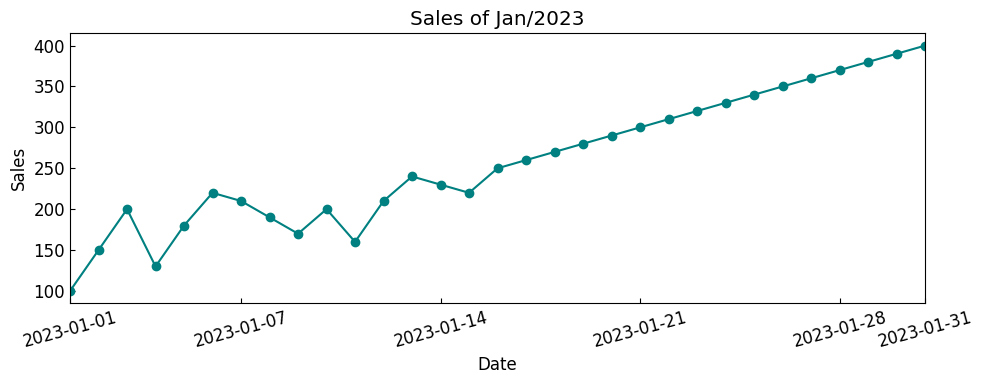

In [64]:
# Plot time series
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(sales_df.index, sales_df['sales'], marker='o', color='teal')

plt.title('Sales of Jan/2023')
plt.xlabel('Date')
plt.ylabel('Sales')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1, 7, 14, 21, 28, 31))) # x-ticks
plt.xticks(rotation=15)
ax.set_xlim([sales_df.index.min(), sales_df.index.max()])  # set range
plt.grid(False)

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig.tight_layout()
plt.show()

Seasonal decomposition using moving averages with Seaborn

In [66]:
# Decomposição da série para identificação de sazonalidades
sales_decomposition = sm.tsa.seasonal_decompose(sales_df['sales'], model='additive')
sales_trend = sales_decomposition.trend
sales_seasonal = sales_decomposition.seasonal
sales_residual = sales_decomposition.resid

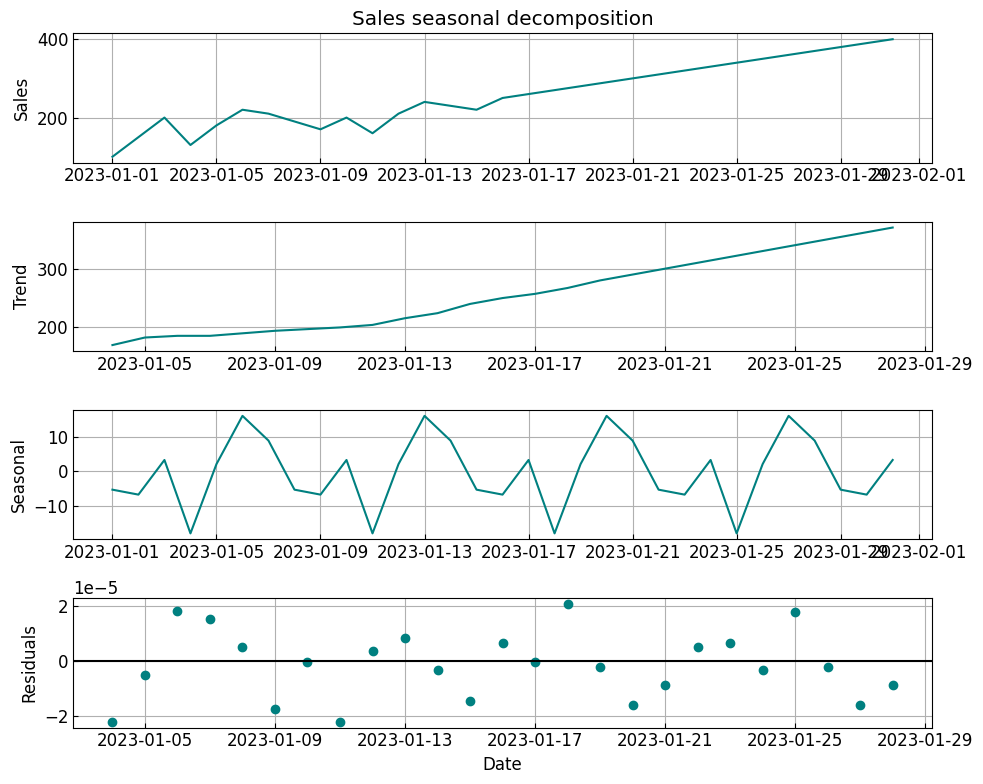

In [69]:
# Plotar decomposição
plt.figure(figsize=(10, 8))

#sales
plt.subplot(411)
plt.plot(sales_df['sales'],color='teal')
plt.title('Sales seasonal decomposition')
plt.ylabel('Sales')
plt.grid(True, which='major')

# Plotar tendência
plt.subplot(412)
plt.plot(sales_trend,color='teal')
plt.ylabel('Trend')
plt.grid(True)


# Plotar sasonalidade
plt.subplot(413)
plt.plot(sales_seasonal,color='teal')
plt.ylabel('Seasonal')
plt.grid(True)

# Plotar o componente residual
plt.subplot(414)
plt.plot(sales_residual* 1e-6, marker='o', linestyle='',color='teal')
plt.axhline(y=0, color='k', linestyle='-')  # Horizontal line at 0
plt.ylabel('Residuals')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()
plt.show()

Time series with Plotly

In [81]:
# Create line plot
fig = go.Figure()

# Create traces
fig.add_trace(go.Scatter(x=sales_df.index, y=sales_df['sales'],
                    mode='lines',
                    name='lines'))


# Adding layout details
fig.update_layout(
    title='Montly Sales',
    xaxis=dict(
        tickfont_size=14,
    ),
    yaxis=dict(
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis_title='Date',
    yaxis_title='Sales',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Gender',
    width=800,  # Adjust width here
    height=400,  # Adjust height here
)
fig.show()